**Gradebook Code Test Notebook**

In [ ]:
#import test dataset from google drive
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('TempData').sheet1
logo="""

   ____     ____        _      ____  U _____ u   ____     U  ___ u   U  ___ u   _  __    
U /"___|uU |  _"\ u U  /"\  u |  _"\ \| ___"|/U | __")u    \/"_ \/    \/"_ \/  |"|/ /    
\| |  _ / \| |_) |/  \/ _ \/ /| | | | |  _|"   \|  _ \/    | | | |    | | | |  | ' /     
 | |_| |   |  _ <    / ___ \ U| |_| |\| |___    | |_) |.-,_| |_| |.-,_| |_| |U/| . \\u   
  \____|   |_| \_\  /_/   \_\ |____/ u|_____|   |____/  \_)-\___/  \_)-\___/   |_|\_\    
  _)(|_    //   \\_  \\    >>  |||_   <<   >>  _|| \\_       \\         \\   ,-,>> \\,-. 
 (__)__)  (__)  (__)(__)  (__)(__)_) (__) (__)(__) (__)     (__)       (__)   \.)   (_/  
"""

In [ ]:
print(logo)



   ____     ____        _      ____  U _____ u   ____     U  ___ u   U  ___ u   _  __    
U /"___|uU |  _"\ u U  /"\  u |  _"\ \| ___"|/U | __")u    \/"_ \/    \/"_ \/  |"|/ /    
\| |  _ / \| |_) |/  \/ _ \/ /| | | | |  _|"   \|  _ \/    | | | |    | | | |  | ' /     
 | |_| |   |  _ <    / ___ \ U| |_| |\| |___    | |_) |.-,_| |_| |.-,_| |_| |U/| . \u   
  \____|   |_| \_\  /_/   \_\ |____/ u|_____|   |____/  \_)-\___/  \_)-\___/   |_|\_\    
  _)(|_    //   \_  \    >>  |||_   <<   >>  _|| \_       \         \   ,-,>> \,-. 
 (__)__)  (__)  (__)(__)  (__)(__)_) (__) (__)(__) (__)     (__)       (__)   \.)   (_/  



In [ ]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataframe into dataframe object
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows[1:])
df.columns = rows[0]

df


,Student ID,First Name,Last Name,Email Address,TEST1,TEST2,TEST3,FINAL
0,1001,Kiley,Caldarera,Kiley.Calh@edu.com,85,69,86,74
1,1002,Rosio,Cork,Rosio.Cork@edu.com,65,70,73,86
2,1003,Ilene,Eroman,Ilene.Erom@edu.com,76,81,99,86
3,1004,Jesusa,Shin,Jesusa.Shin@edu.com,90,95,68,69
4,1005,Jose,Stockham,Jose.Stoc@edu.com,73,73,86,77


In [ ]:
# Calculating mean,percentile, std for the data

numeric_columns = ["TEST1", "TEST2", "TEST3", "FINAL"]

# coverting all the scores to numeric
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# removing null values to avoid errors 
df.dropna(inplace = True) 
  
# percentile list
perc =[.20, .40, .60, .80]
  
# list of dtypes to include
include =['float','int']
  
# calling describe method
desc = df.describe(percentiles = perc, include = include)
  
# display
desc

,TEST1,TEST2,TEST3,FINAL,Student Average
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,77.800000,77.600000,82.400000,78.400000,79.050000
std,9.884331,10.807405,12.218838,7.503333,4.417296
min,65.000000,69.000000,68.000000,69.000000,73.500000
20%,71.400000,69.800000,72.000000,73.000000,76.500000
40%,74.800000,71.800000,80.800000,75.800000,78.000000
50%,76.000000,73.000000,86.000000,77.000000,78.500000
60%,79.600000,76.200000,86.000000,80.600000,79.300000
80%,86.000000,83.800000,88.600000,86.000000,81.500000
max,90.000000,95.000000,99.000000,86.000000,85.500000


In [ ]:
# The function get_stats return all the values in a particular row of dataframe desc
def get_stats(stat):
  
  # retrieving row by loc method
  return desc.loc[stat]


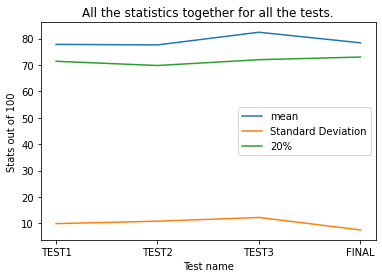

In [ ]:
# plot means for all tests
# add selected parameters to graph
plt.plot(get_stats('mean'), label ='mean')
plt.plot(get_stats('std'), label ='Standard Deviation')
plt.plot(get_stats('20%'), label ='20%')

# Adding title
plt.title('All the statistics together for all the tests.')

# Adding x and y labels
plt.xlabel('Test name')
plt.ylabel('Stats out of 100')

# Adding captions 
plt.legend()
plt.show()

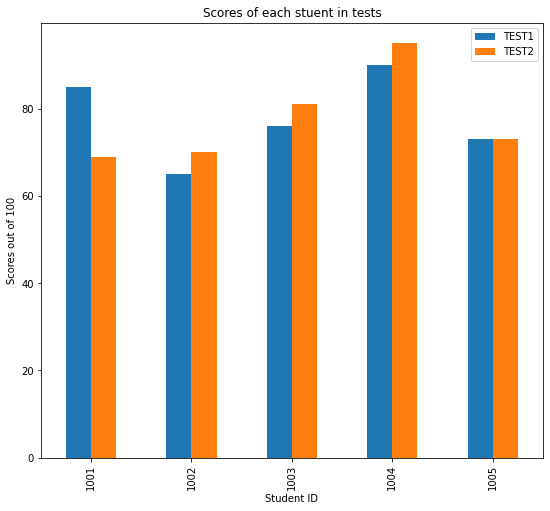

In [ ]:
def all_students(tests=["TEST1", "TEST2","TEST3", "FINAL"]):

  df.plot(x="Student ID", y=tests, kind="bar", figsize=(9, 8))
  #df.plot(x="Student ID", y=["TEST1", "TEST2","TEST1", "FINAL"], kind="bar", figsize=(9, 8))
  plt.ylabel('Scores out of 100')
  plt.title('Scores of each stuent in tests')
  plt.show()

all_students(["TEST1", "TEST2"])

In [ ]:
df_transpose = df.transpose()
df_transpose
# How can we make student iD header row


,0,1,2,3,4
Student ID,1001,1002,1003,1004,1005
First Name,Kiley,Rosio,Ilene,Jesusa,Jose
Last Name,Caldarera,Cork,Eroman,Shin,Stockham
Email Address,Kiley.Calh@edu.com,Rosio.Cork@edu.com,Ilene.Erom@edu.com,Jesusa.Shin@edu.com,Jose.Stoc@edu.com
TEST1,85.0,65.0,76.0,90.0,73.0
TEST2,69.0,70.0,81.0,95.0,73.0
TEST3,86.0,73.0,99.0,68.0,86.0
FINAL,74.0,86.0,86.0,69.0,77.0
Student Average,78.5,73.5,85.5,80.5,77.25


In [ ]:
# Removing non TEST rows from transpose
update_df = df_transpose.drop(['Student ID', 'First Name','Last Name','Email Address'])
update_df


,0,1,2,3,4
TEST1,85,65,76,90,73
TEST2,69,70,81,95,73
TEST3,86,73,99,68,86
FINAL,74,86,86,69,77


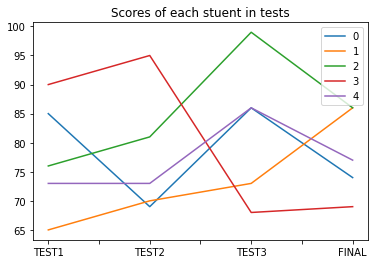

In [ ]:
update_df.plot()
plt.title('Scores of each stuent in tests')
plt.show()


In [ ]:
# Plot student scores in all the tests
def individual_scores(student):
  plt.plot(update_df[student], label = f'{student}')
  plt.xlabel('Tests')
  plt.ylabel('Scores out of 100')
  plt.title(f"Test scores for student {student}")
  plt.legend()
  plt.show()

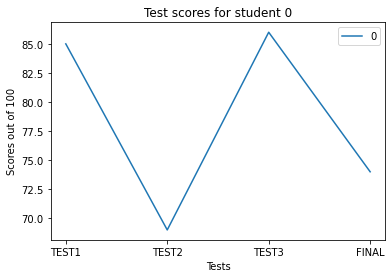

In [ ]:
individual_scores(0)

In [ ]:
#calculate all average by row
update_df['Student Average'] = update_df.mean(axis = 1)

#Add student averages back to the main dataframe
update_df['Student Average'] = update_df['Student Average']
update_df

,0,1,2,3,4,Student Average
TEST1,85,65,76,90,73,77.8
TEST2,69,70,81,95,73,77.6
TEST3,86,73,99,68,86,82.4
FINAL,74,86,86,69,77,78.4


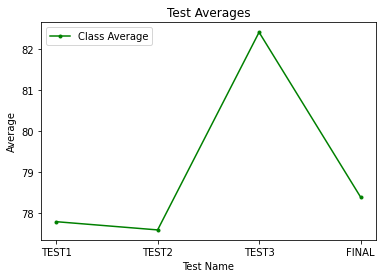

In [ ]:
plt.plot(update_df['Student Average'],'g.-', label = 'Class Average')
plt.title('Test Averages')
plt.xlabel('Test Name')
plt.ylabel('Average')
plt.legend()
plt.show()

In [ ]:
# Modify dataframe to contain pertainant values
numeric_columns = ["TEST1", "TEST2", "TEST3", "FINAL"]

df_mod = df

# coverting all the scores to numeric
df_mod[numeric_columns] = df_mod[numeric_columns].apply(pd.to_numeric)

df_mod = df_mod.drop(["Student ID","First Name", "Last Name","Email Address"], axis = 1)

df_mod

,TEST1,TEST2,TEST3,FINAL
0,85,69,86,74
1,65,70,73,86
2,76,81,99,86
3,90,95,68,69
4,73,73,86,77


In [ ]:
#Statistics by test
def test_mean(testname=''):
  #select test
  testname = 'TEST1'

  #convert values to float
  df[testname] = df[testname].astype(float)

  df_mean = df[testname].mean()
  return df_mean


In [ ]:
#Statistics by student

#calculate all average by row
df_mod['Student Average'] = df_mod.mean(axis = 1)

#Add student averages back to the main dataframe
df['Student Average'] = df_mod['Student Average']

df

,Student ID,First Name,Last Name,Email Address,TEST1,TEST2,TEST3,FINAL,Student Average
0,1001,Kiley,Caldarera,Kiley.Calh@edu.com,85,69,86,74,78.50
1,1002,Rosio,Cork,Rosio.Cork@edu.com,65,70,73,86,73.50
2,1003,Ilene,Eroman,Ilene.Erom@edu.com,76,81,99,86,85.50
3,1004,Jesusa,Shin,Jesusa.Shin@edu.com,90,95,68,69,80.50
4,1005,Jose,Stockham,Jose.Stoc@edu.com,73,73,86,77,77.25


In [ ]:
#df.append({'TEST1':50,'TEST2':60,'TEST3':70,'FINAL':80}, ignore_index=True)

# create an Empty DataFrame object
df_temp = pd.DataFrame()

#converting df_mod means series to a list
class_avg = (df_mod.mean()).tolist()

#Appending df_temp to df, where df_temp is a temporary dataframe to store the mappings of means to the tests
for i in range(len(df_mod.columns)):
  df_temp[df_mod.columns[i]] =[class_avg[i]]
df = df.append(df_temp,ignore_index = True)
df


,Student ID,First Name,Last Name,Email Address,TEST1,TEST2,TEST3,FINAL,Student Average
0,1001,Kiley,Caldarera,Kiley.Calh@edu.com,85.0,69.0,86.0,74.0,78.50
1,1002,Rosio,Cork,Rosio.Cork@edu.com,65.0,70.0,73.0,86.0,73.50
2,1003,Ilene,Eroman,Ilene.Erom@edu.com,76.0,81.0,99.0,86.0,85.50
3,1004,Jesusa,Shin,Jesusa.Shin@edu.com,90.0,95.0,68.0,69.0,80.50
4,1005,Jose,Stockham,Jose.Stoc@edu.com,73.0,73.0,86.0,77.0,77.25
5,NaN,NaN,NaN,NaN,77.8,77.6,82.4,78.4,79.05


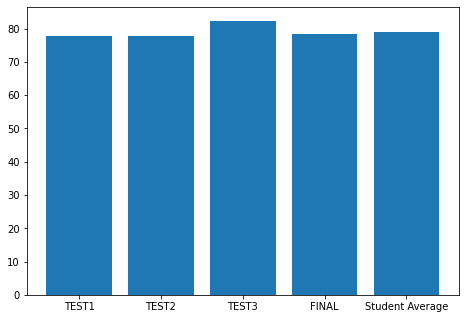

In [ ]:
#Class avg bar graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
means = df_mod.columns
tests = class_avg
ax.bar(means,tests)
plt.show()


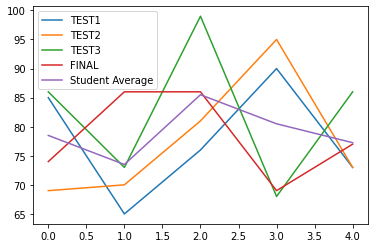

In [ ]:
#Class avg line graph
df_mod.plot()

In [ ]:
#Plot Standard Deviation
#Plot Grades and Standard Deviation (by test or class average)
df_mod.describe()

#TODO: Use to create SD for each test
#TODO: Add student test data as scatter plot to the same graph

,TEST1,TEST2,TEST3,FINAL,Student Average
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,77.800000,77.600000,82.400000,78.400000,79.050000
std,9.884331,10.807405,12.218838,7.503333,4.417296
min,65.000000,69.000000,68.000000,69.000000,73.500000
25%,73.000000,70.000000,73.000000,74.000000,77.250000
50%,76.000000,73.000000,86.000000,77.000000,78.500000
75%,85.000000,81.000000,86.000000,86.000000,80.500000
max,90.000000,95.000000,99.000000,86.000000,85.500000


,0,1,2,3,4
TEST1,85.0,65.0,76.0,90.0,73.00
TEST2,69.0,70.0,81.0,95.0,73.00
TEST3,86.0,73.0,99.0,68.0,86.00
FINAL,74.0,86.0,86.0,69.0,77.00
Student Average,78.5,73.5,85.5,80.5,77.25


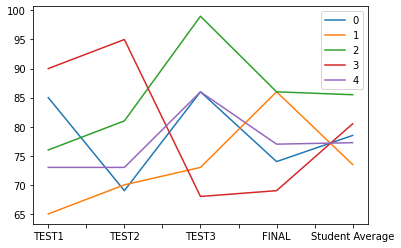

In [ ]:
#Class avg line graph (Student Average)

#Transform graph to plot by student rather than by test
df_student = df_mod.T
df_student.plot()
df_student

#TODO: write a function to graph this for a single student
#TODO: write a function to graph this for a subset of students